In [1]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import random

## 1 

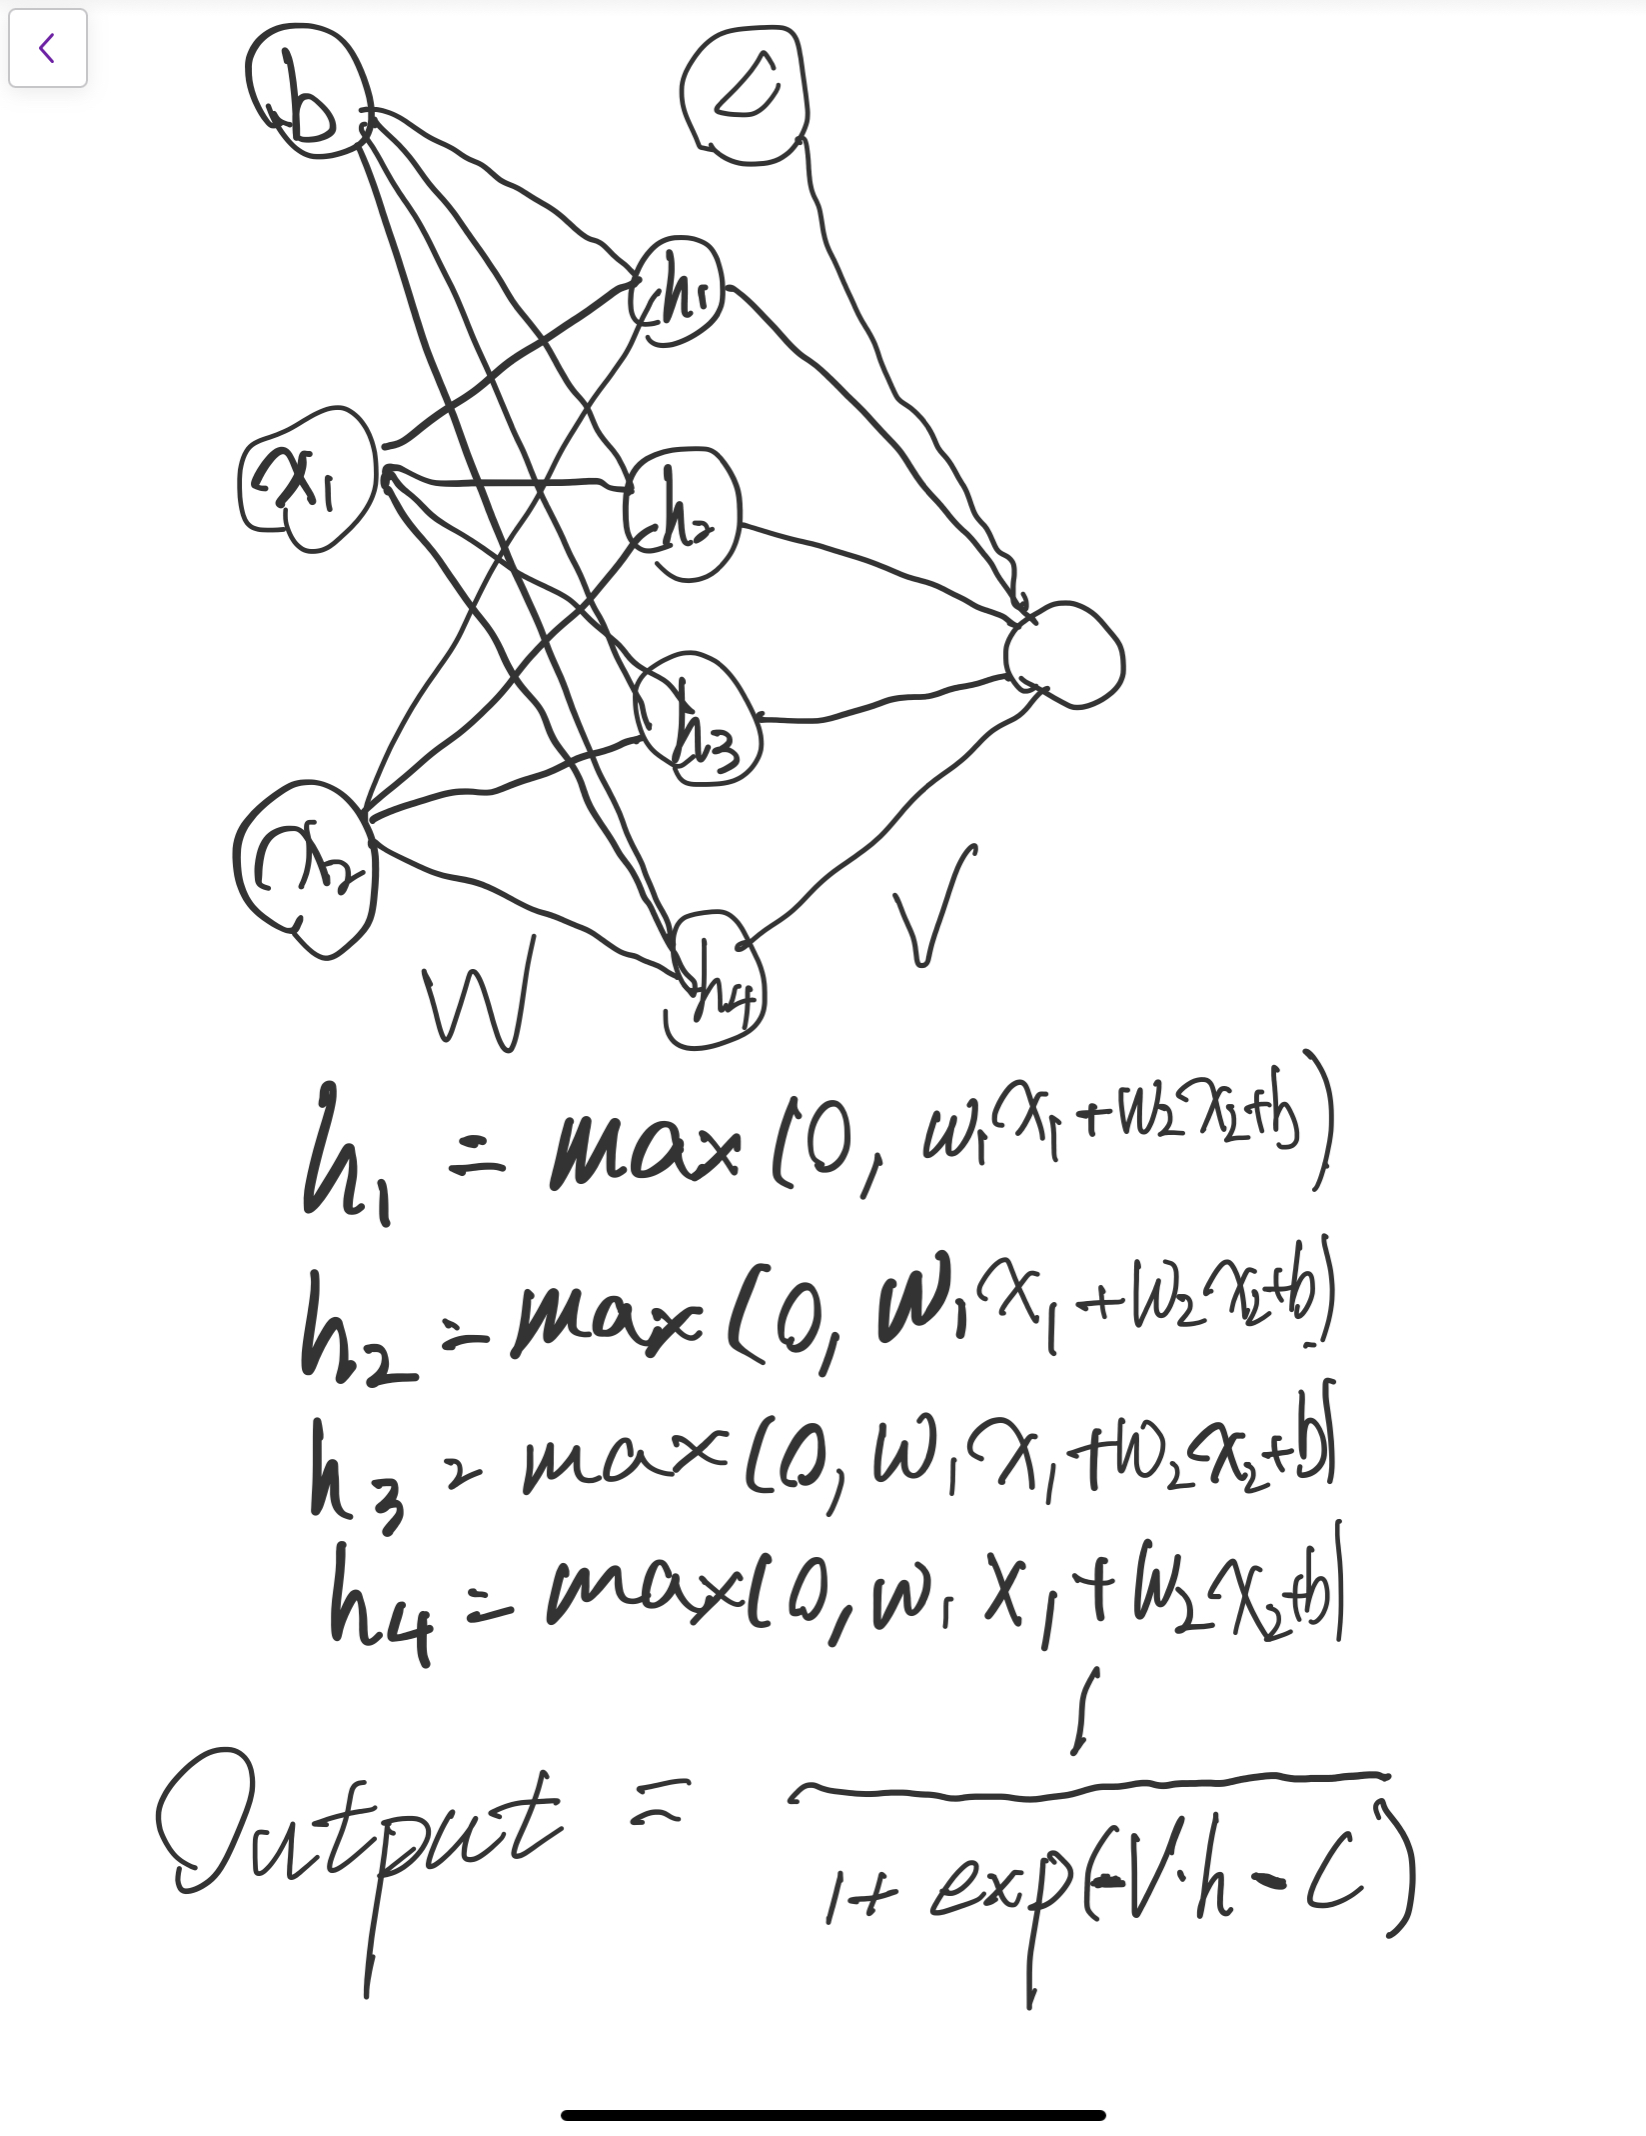

In [2]:
def relu(z):
    return np.where(z > 0, z, 0)

def sigmoid(z):
    '''
    sigmoid activation function
    '''
    return 1/(1+np.exp(-z))

In [3]:
def ff_nn_ReLu(X, W, b, V, c):

    res = relu(np.array(X)@np.array(W)+b)
    return sigmoid(np.dot(res,np.array(V))+c)

    

In [4]:
x = [[1,-1], [0,-1], [0, 1]]
w = [[1, -1, 0, 1], [0, 0, 0.5, 1]]
b = [0, 0, 1, 0]
v = [1, 0, -1, 1]
c = 1

ff_nn_ReLu(x,w,b,v,c)

array([0.81757448, 0.62245933, 0.62245933])

## 2

1. $$f_x(x,y) = -3x^2-100(2y^2-x)$$
$$f_y(x,y) = 400y\cdot(2y^2-x)$$

2.

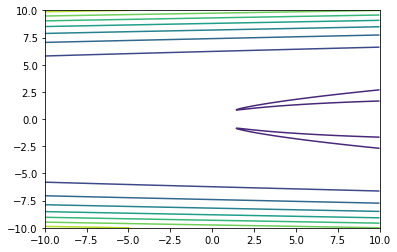

In [5]:
x = np.linspace(-10.0, 10.0, 1000)
y = np.linspace(-10.0, 10.0, 1000)
X, Y = np.meshgrid(x, y)
Z = 3-X**3 +  50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3.

In [6]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-100*(2*y**2-x)
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):    
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    trajs = [(x,y)]
    for i in range(iterations):
        g = grad_f((x,y))
        x = x-learning_rate*g[0]
        y = y-learning_rate*g[1]
        trajs.append([x,y])
    return np.array(trajs)

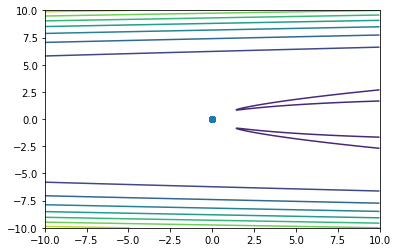

In [42]:
traj = grad_descent([0,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

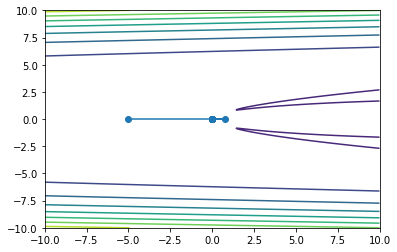

In [7]:
traj = grad_descent([-5,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

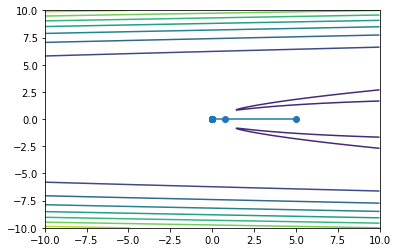

In [10]:
np.random.seed(10)
traj = grad_descent([5,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

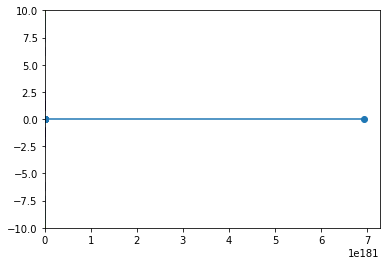

In [14]:
np.random.seed(10)
traj = grad_descent([50,0],iterations=10, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [16]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point == None:
        x = 10
        y = 10
    else:
        x = starting_point[0]
        y = starting_point[1]
    v = np.zeros(np.shape(np.array([0,0])))
    trajs = [(x,y)]
    for _ in range(iterations):
        g = grad_f((x,y))
        v = alpha*v - epsilon*g
        x = x+v[0]
        y = y+v[1]
        trajs.append([x,y])
        
        
    return np.array(trajs)

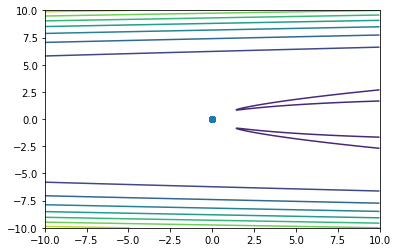

In [17]:
traj = grad_descent_with_momentum((0,0),iterations=10, epsilon=0.2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

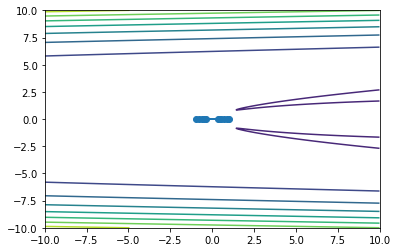

In [29]:
traj = grad_descent_with_momentum((1,0),iterations=10, epsilon=0.02, alpha=.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


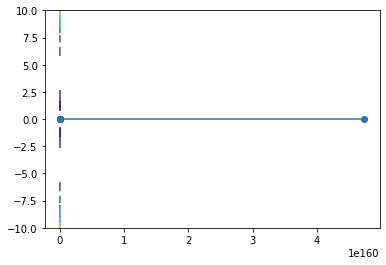

In [30]:
traj = grad_descent_with_momentum((1,0),iterations=10, epsilon=0.2, alpha=.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3

In [31]:
def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def grad_f(x, y, y_hat, w, b, v, c):
    d_loss_y_hat = binary_xent_residual(y, y_hat)
    
    h = relu(np.array(x)@np.array(w)+b)
    e = 1/(1+np.exp(-np.dot(h,v)-c))
    
    dw = x.T.dot(np.expand_dims((d_loss_y_hat * y_hat*(1-y_hat)*e),1).dot(np.expand_dims(v,1).T))
    db = (d_loss_y_hat* y_hat*(1-y_hat)*e).T.dot(np.where(h<=0,0,1))*v
    
    dv = (d_loss_y_hat* y_hat*(1-y_hat)*e).T.dot(h)
    dc = d_loss_y_hat.dot( y_hat*(1-y_hat)*e)
    
    return np.array([dw,db,dv,dc])/len(y)
    

In [32]:
x = np.array([[1,-1], [0,-1], [0, 1]])
w = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.array([0, 0, 1, 0])
v = np.array([1, 0, -1, 1])
c = 1
y_pred = ff_nn_ReLu(x,w,b,v,c)

In [33]:
print(grad_f(x, np.array([1,1,1]),y_pred,w,b,v,c))

[array([[ 0.06080851,  0.        , -0.06080851,  0.06080851],
       [-0.06080851,  0.        ,  0.06080851, -0.06080851]])
 array([ 0.06080851,  0.        , -0.31250229,  0.12584689])
 array([0.06080851, 0.        , 0.28209803, 0.12584689])
 0.3125022871342158]


/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


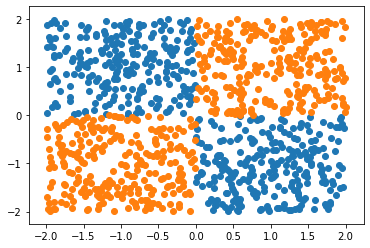

In [34]:
X = 4*np.random.rand(1000,2)-2
y = np.zeros(1000)
x0 = []
x1 = []
for i,x in enumerate(X):
    if x[0]*x[1] >= 0:
        y[i] = 1
        x1.append(x)
    else:
        x0.append(x)
x1 = np.array(x1)
x0 = np.array(x0)
plt.scatter(x0[:,0],x0[:,1])
plt.scatter(x1[:,0],x1[:,1])
plt.show()

In [35]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))



def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    for i in range(iterations):
        
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        w = w+learning_rate*dw
        b = b+learning_rate*db
        v = v+learning_rate*dv
        c = c+learning_rate*dc
        
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [36]:
params_gd, losses_gd =  grad_descent(X, y, w,b,v,c)

/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [37]:
losses_gd

[809.9734723509234,
 778.9576379674456,
 750.9145878508689,
 725.7420353130144,
 703.2552890673751,
 683.3691390352822,
 665.9038259867953,
 650.7248900752761,
 637.5958376125477,
 626.3333248006365,
 616.7185522555756]

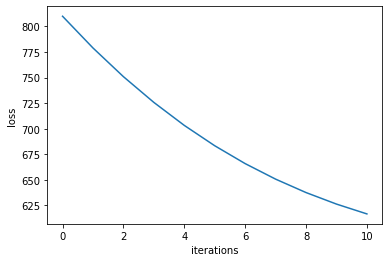

In [39]:
plt.plot(losses_gd)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

In [40]:
def momentum_grad_descent(x, y_true, w, b, v, c, iterations=10, alpha=.1, epsilon=0.5):  
    y_pred = ff_nn_ReLu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    
    vw = np.zeros(w.shape)
    vb = np.zeros(b.shape)
    vv = np.zeros(v.shape)
    vc = 0
    for _ in range(iterations):
        
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        
        vw = alpha*vw - epsilon*dw
        vb = alpha*vb - epsilon*db
        vv = alpha*vv - epsilon*dv
        vc = alpha*vc - epsilon*dc
        
        w = w-vw
        b = b-vb
        v = v-vv
        c = c-vc
        
        y_pred = ff_nn_ReLu(x,w,b,v,c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [41]:
params_m, losses_m =  momentum_grad_descent(X, y, w,b,v,c)

/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [42]:
losses_m

[809.9734723509234,
 673.5594608004142,
 601.3481026025406,
 578.1206026488308,
 571.5935891259753,
 569.0470413091475,
 567.6419081372028,
 566.5335044908768,
 565.489891662166,
 564.4789749812719,
 563.5068121300554]

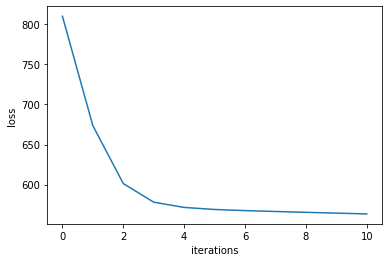

In [43]:
plt.plot(losses_m)
plt.ylabel("loss")
plt.xlabel("iterations")
plt.show()

With the settings, the momentum is much faster than gradient descent.

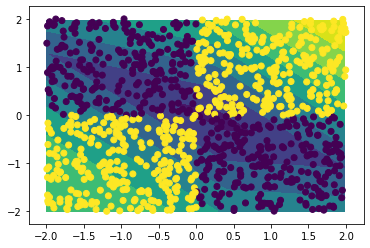

In [69]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T, params_m[0],params_m[1],params_m[2],params_m[3]).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)
plt.scatter(X[:,0],X[:,1],c=y)